## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
data = pd.read_csv(
    'https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')

In [3]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [4]:
data.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [5]:
print(f'Rows: {data.shape[0]} Columns: {data.shape[1]}')

Rows: 1000 Columns: 21


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [6]:
(data.isna() | (data == '')).any(axis=None)

False

In [7]:
data.dtypes

status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate           object
personal_status_sex        object
other_debtors              object
present_residence          object
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits             object
job                        object
people_liable              object
telephone                  object
foreign_worker             object
credit_risk                object
dtype: object

In [8]:
data.nunique()

status                       4
duration                    33
credit_history               5
purpose                     10
amount                     923
savings                      5
employment_duration          5
installment_rate             4
personal_status_sex          4
other_debtors                3
present_residence            4
property                     4
age                         53
other_installment_plans      3
housing                      3
number_credits               4
job                          4
people_liable                2
telephone                    2
foreign_worker               2
credit_risk                  2
dtype: int64

При распределении опираемся на данные pandas и описание самого датасета
- Количественные признаки
    1. duration
    2. amount
    3. age
- Бинарные признаки
    1. telephone
    2. foreign_worker
    3. credit_risk
    4. people_liable  
       *Вообще сложно назвать его бинарным - все-таки там указывается числовой промежуток.
       Но поскольку возможных значений всего 2, после обработки он по сути будет являться бинарным признаком.
       Было бы еще хорошо понимать, что признак вообще означает, но описание там довольно скудное.*
- Порядковые категориальные признаки
    1. status  
       *Чем больше средств, тем лучше.*
    2. credit_history  
       *Чем меньше просрочек и кредитов, тем лучше.*
    3. savings  
       *Чем больше, тем лучше*
    4. employment_duration  
       *Чем больше, тем лучше - показатель стабильности дохода клиента.*
    5. installment_rate  
       *Не до конца уверен, что это, но скорее всего это размер ежемесячных выплат по кредиту относительно общих доступных доходов.
       В таком случае вполне очевидно, что чем меньшая доля доходов уходит на выплаты по кредиту, тем легче клиенту его выплатить.*
    6. present_residence  
       *Чем дольше, тем лучше - опять же показывает насколько у клиента стабильна жизненная ситуация*
    7. number_credits  
       *Чем меньше кредитов, тем лучше - вполне очевидно*
    8. job  
       *Чем выше позиция и квалификация, тем лучше*
- Номинальные категориальные
    1. purpose  
       *Даже если какой-то порядок и есть, он неочевиден*
    2. personal_status_sex
    3. other_debtors
    4. property  
       *Отображает наиболее дорогую собственность клиента.
       Поскольку мы не знаем ни стоимость этого объекта, ни какую либо информацию о другой собственности клиента,
       признак мало чего чем нам полезен и порядок между возможными значениями выстроить не представляется возможным.*
    5. other_installment_plans  
       *Неочевиден порядок между 'bank' и 'store'*
    6. housing


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [9]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [10]:
sample = data['age'] < 30
(sample & (data['housing'] == 'rent')).sum() / sample.sum()

0.6666666666666666

In [11]:
sample = data['age'] > 40
(sample & (data['housing'] == 'rent')).sum() / sample.sum()

0.6801470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [12]:
((data['foreign_worker'] == 'yes') & (~data['number_credits'].isin(['1', '3-4']))).sum()

12

### Задание 6 (1 балл)

In [13]:
import numpy as np
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

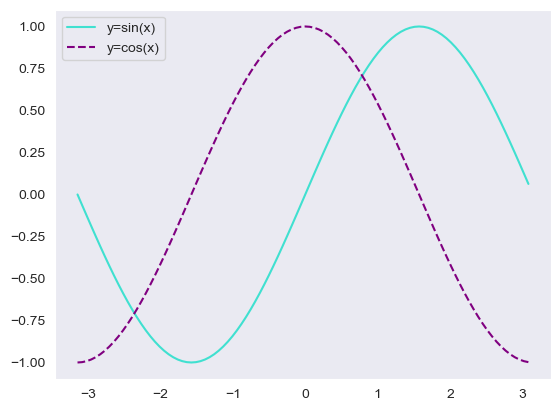

In [14]:
x = np.arange(-np.pi, np.pi, np.pi / 50)

plt.plot(x, np.sin(x), label='y=sin(x)', color='turquoise')
plt.plot(x, np.cos(x), label='y=cos(x)', color='purple', linestyle='dashed')

plt.legend()
plt.grid()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

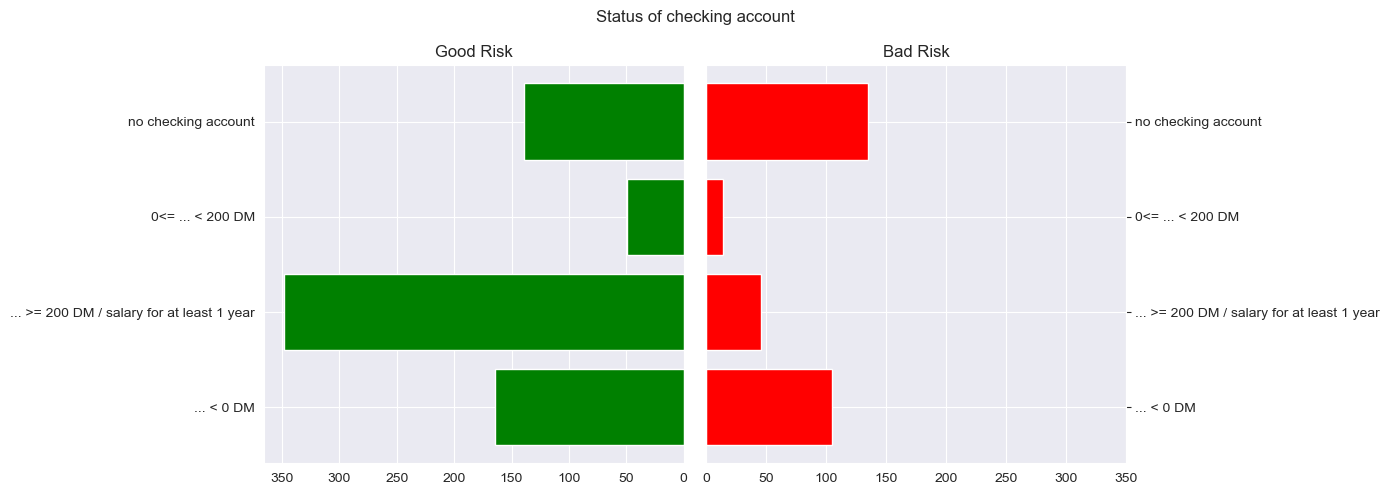

In [15]:
good = data[data['credit_risk'] == 'good']
good = good.groupby('status')['status'].count().to_frame()

bad = data[data['credit_risk'] == 'bad']
bad = bad.groupby('status')['status'].count().to_frame()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.suptitle('Status of checking account')

ax1.barh(good.index.tolist(), good['status'].values, color='green')
ax1.set_title('Good Risk')
ax1.set_xticks(np.arange(0, 351, 50))
ax1.invert_xaxis()

ax2.barh(bad.index.tolist(), bad['status'].values, color='red')
ax2.set_title('Bad Risk')
ax2.set_xticks(np.arange(0, 351, 50))
ax2.yaxis.tick_right()

fig.set_size_inches(14, 5, forward=True)
plt.tight_layout()
plt.show()

Отчетливо видна зависимость кредитного риска от получаемого дохода - чем больше зарплата, тем выше вероятность возврата кредита, что вполне логично

### Задание 8  (0.5 балла)

In [16]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

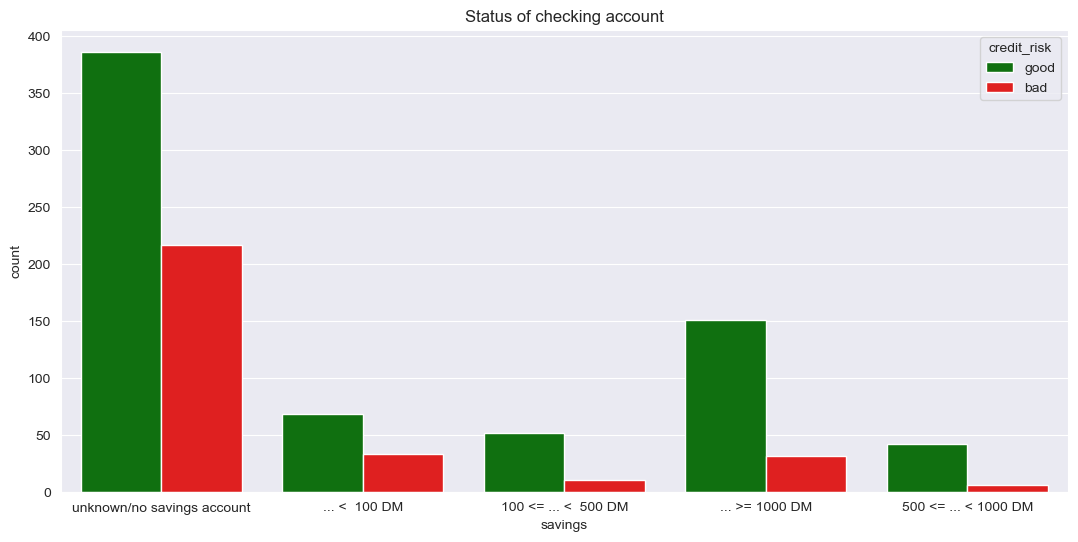

In [17]:
plt.figure(figsize=(13, 6))
sns.countplot(x='savings', hue='credit_risk', data=data, palette=['green', 'red'])
plt.title('Status of checking account')
plt.show()

1. Поскольку людей с хорошим кредитным рейтингом в выборке гораздо больше, какой-то очевидной зависимости проследить не удается.
Было бы полезнее увидеть график не с абсолютными, а относительными значениями (какой процент от людей с хорошим рейтингом не имеет сбережений и т.д.)
Тем не менее, среди клиентов с высокими сбережениями количество людей с хорошим рейтингом гораздо больше, чем количество людей с плохим, что намекает на существование вполне ожидаемой зависимости. Однако, опираясь только на этот график, с абсолютной уверенностью об этом говорить не приходится
2. Первый способ очень затратный в плане написания кода и получающийся график не совсем удобен для восприятия. По впечатлениям, график, построенный с помощью seaborn, в большинстве случаев будет вполне достаточен

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

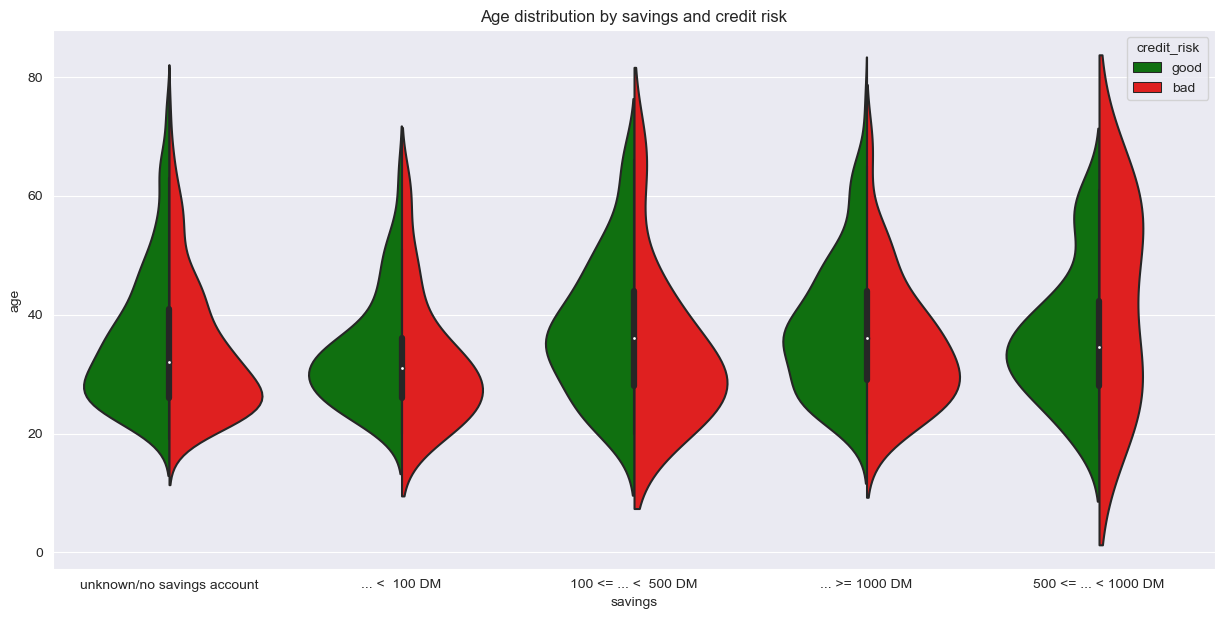

In [18]:
plt.figure(figsize=(15, 7))
sns.violinplot(x='savings', y='age', hue='credit_risk', data=data, palette=['green', 'red'], split=True)
plt.title('Age distribution by savings and credit risk')
plt.show()

1. Можно заметить, что наибольшее количество людей с хорошим рейтингом имеют возраст где-то от 20 до 40 лет, но это верно и для людей с плохим рейтингом, так что это просто особенность выборки
2. Нарушается эта закономерность только при уровне дохода $[500; 1000)$ DM, где плохой кредитный рейтинг не коррелирует с возрастом. Причины этого не ясны...

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

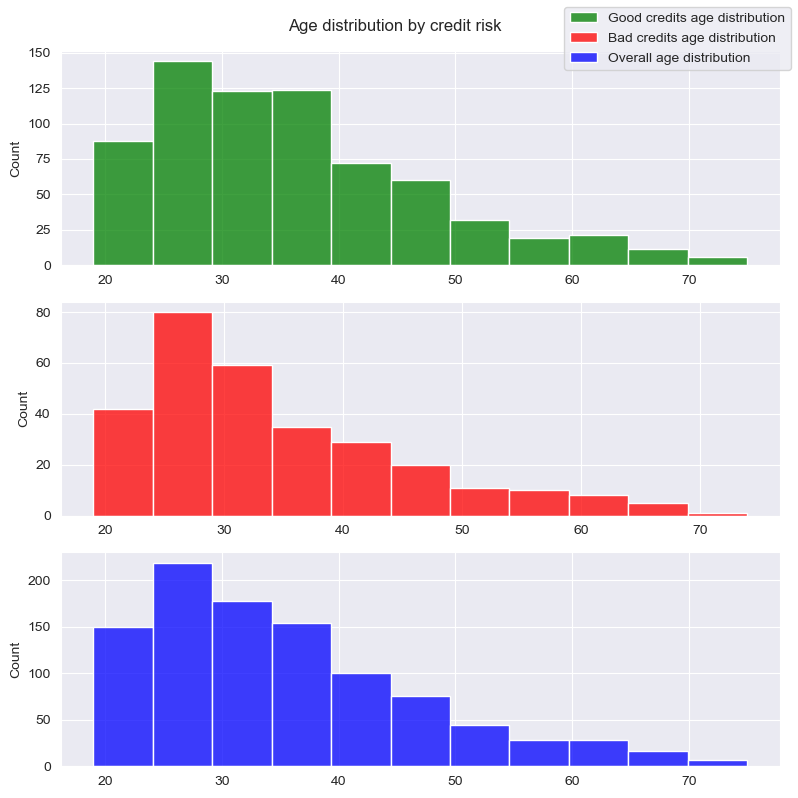

In [19]:
plt.figure(figsize=(8, 8))

plt.subplot(3, 1, 1)
sns.histplot(data[data['credit_risk'] == 'good']['age'], bins=11, color='green')
plt.xlabel('')

plt.subplot(3, 1, 2)
sns.histplot(data[data['credit_risk'] == 'bad']['age'], bins=11, color='red')
plt.xlabel('')

plt.subplot(3, 1, 3)
sns.histplot(data['age'], bins=11, color='blue')
plt.xlabel('')

plt.suptitle('Age distribution by credit risk')
plt.figlegend(['Good credits age distribution',
               'Bad credits age distribution',
               'Overall age distribution'])
plt.tight_layout()
plt.show()

Графики подтверждают предыдущие наблюдения о среднем возрасте выборки и демонстрируют интересный факт - в промежутке около 35-40 лет кредитные рейтинги по какой-то причине гораздо лучше, хотя в целом между возрастом и рейтингом корреляции нет

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

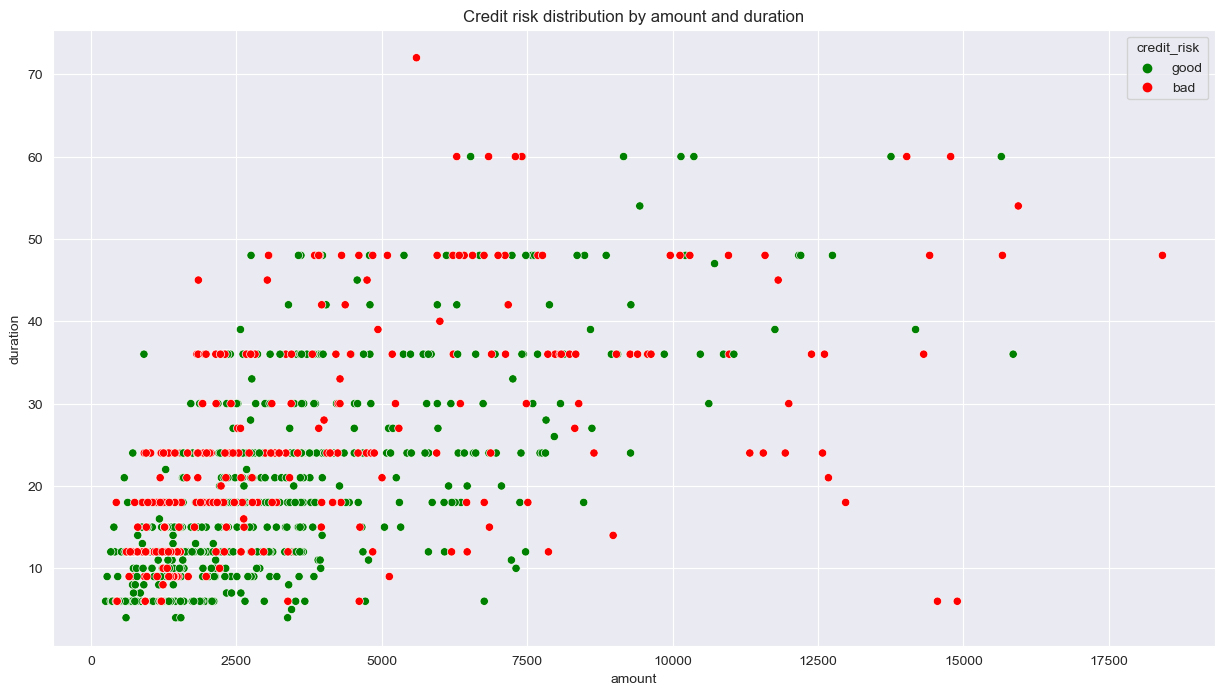

In [20]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='amount', y='duration', hue='credit_risk', data=data, palette=['green', 'red'])
plt.title('Credit risk distribution by amount and duration')
plt.show()

Большая часть кредитов в выборке взята на маленькую сумму и на относительно небольшой срок, причем меньшие сроки в целом увеличивают кредитный рейтинг

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

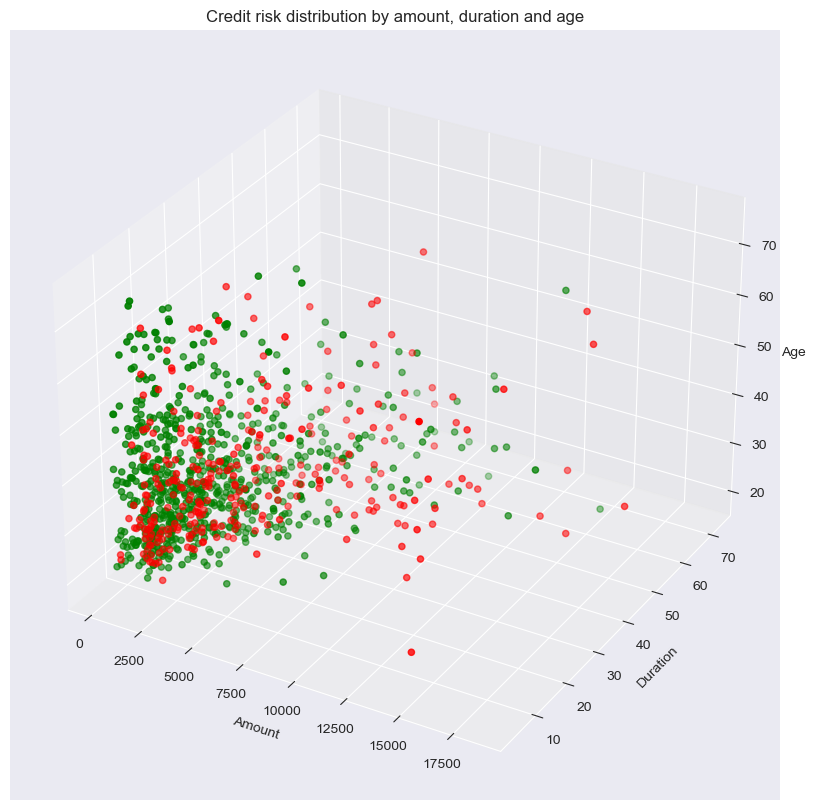

In [21]:
good = data[data['credit_risk'] == 'good']
bad = data[data['credit_risk'] == 'bad']

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter3D(good['amount'], good['duration'], good['age'], c='green')
ax.scatter3D(bad['amount'], bad['duration'], bad['age'], c='red')
ax.set_xlabel('Amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

plt.title('Credit risk distribution by amount, duration and age')
plt.show()

Дополняя выводы из предыдущего графика, для кредитов с небольшим сроком и суммой кредитный риски лучше для людей большего возраста (как раз где-то в районе 35-40 лет)

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

#### Бинарные признаки

In [22]:
data['telephone'] = data['telephone'].map({'no': 0, 'yes (under customer name)': 1})
data['foreign_worker'] = data['foreign_worker'].map({'no': 0, 'yes': 1})
data['credit_risk'] = data['credit_risk'].map({'bad': 0, 'good': 1})
data['people_liable'] = data['people_liable'].map({'0 to 2': 0, '3 or more': 1})

#### Порядковые признаки

In [23]:
data['status'] = data['status'].map({'no checking account': 0,
                                     '... < 0 DM': 1,
                                     '0<= ... < 200 DM': 2,
                                     '... >= 200 DM / salary for at least 1 year': 3})
data['credit_history'] = data['credit_history'].map({'critical account/other credits elsewhere': 0,
                                                     'delay in paying off in the past': 1,
                                                     'existing credits paid back duly till now': 2,
                                                     'all credits at this bank paid back duly': 3,
                                                     'no credits taken/all credits paid back duly': 4})
data['savings'] = data['savings'].map({'unknown/no savings account': 0,
                                       '... <  100 DM': 1,
                                       '100 <= ... <  500 DM': 2,
                                       '500 <= ... < 1000 DM': 3,
                                       '... >= 1000 DM': 4})
data['employment_duration'] = data['employment_duration'].map({'unemployed': 0,
                                                               '< 1 yr': 1,
                                                               '1 <= ... < 4 yrs': 2,
                                                               '4 <= ... < 7 yrs': 3,
                                                               '>= 7 yrs': 4})
data['installment_rate'] = data['installment_rate'].map({'>= 35': 0,
                                                         '25 <= ... < 35': 1,
                                                         '20 <= ... < 25': 2,
                                                         '< 20': 3})
data['present_residence'] = data['present_residence'].map({'< 1 yr': 0,
                                                           '1 <= ... < 4 yrs': 1,
                                                           '4 <= ... < 7 yrs': 2,
                                                           '>= 7 yrs': 3})
data['number_credits'] = data['number_credits'].map({'>= 6': 0,
                                                     '4-5': 1,
                                                     '2-3': 2,
                                                     '1': 3})
data['job'] = data['job'].map({'unemployed/unskilled - non-resident': 0,
                               'unskilled - resident': 1,
                               'skilled employee/official': 2,
                               'manager/self-empl./highly qualif. employee': 3})

#### Категориальные признаки

In [24]:
data = data.drop(
    columns=['purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing'])

In [25]:
data.head()

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,18,3,1049,0,1,3,3,21,3,2,0,0,0,1
1,0,9,3,2799,0,2,1,1,36,2,2,1,0,0,1
2,1,12,4,841,1,3,1,3,23,3,1,0,0,0,1
3,0,12,3,2122,0,2,2,1,39,2,1,1,0,1,1
4,0,12,3,2171,0,2,3,3,38,2,1,0,0,1,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [26]:
def normal_distribution(mu: float, sigma: float, arg: float) -> float:
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.power(np.e, -1 / 2 * np.square((arg - mu) / sigma))


def age_distribution(age: float) -> float:
    return normal_distribution(36.220000, 20, age) / normal_distribution(36.220000, 20, 36.220000) + 0.1


def duration_distribution(duration: float) -> float:
    return normal_distribution(19.207143, 15, duration) / normal_distribution(19.207143, 15, 19.207143) + 0.1


def amount_distribution(amount: float) -> float:
    return normal_distribution(2985.442857, 5000, amount) / normal_distribution(2985.442857, 5000, 2985.442857) + 0.1


def predict(Xtest: np.array) -> np.array:
    result = []
    threshold = 9
    for x in Xtest:
        val = (
                x[0] / 3 +
                duration_distribution(x[1]) +
                x[2] / 3 +
                amount_distribution(x[3]) +
                x[4] / 4 +
                x[5] / 3 +
                (3 - x[6]) / 2 +  # этот параметр отвечает за тот самый таинственный installment_rate и при обратном порядке результаты лучше
                x[7] / 2 +
                age_distribution(x[8]) +
                x[9] / 3 +
                x[10] / 2 +
                (1 - x[11]) +
                x[12] +
                x[13]
        )
        result.append(val > threshold)
    return result


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
accuracy_score(y_test, predict(X_test))

/var/folders/mv/t2n0032d28x_r1br2h8tqzvw0000gn/T/ipykernel_68616/968266927.py:44: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('credit_risk', 1).values


0.712

Формула по большей части выводилась по принципу проб и ошибок. Каждый параметр здесь имеет примерно одинаковый вклад (что не совсем оптимально, но у меня, к сожалению, закончилось время) в своем наиболее оптимальном случае добавляя в сумму ~1 и 0 в худшем. В конечном итоге когда кредитный риск по количеству хороших параметров.
Для количественных величин использовались нормальные распределения, за центральную точку выбраны средние значения соответствующих параметров среди людей с хорошим рейтингом. Второй параметр подбирался для относительной гладкости распределений.
Так как методы машинного обучения применять нельзя, применения для тренировочной выборки не нашлось ¯\_(ツ)_/¯
